In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

plt.style.use('ggplot')

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-12-23 18:48:37.558008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-23 18:48:37.558074: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load Data and Subset

<Item title:"SAC_Oak_Recruitment_RT" type:Feature Layer Collection owner:Anooshi>
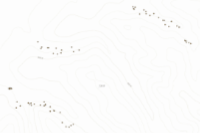

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('8ee3ddf4a20d40989f09fab2c6701d35')

stations = output['data0']
observations = output['table0']
feature_service = output['feature_service']

In [3]:
data = stations.merge(observations, left_on='GlobalID', right_on='Ref_to_Stations', how='inner')
data = data.drop(columns=['GlobalID_x','Ref_to_Stations'])
data = data.rename(columns={'OBJECTID_x':'Point_ObjectID','OBJECTID_y':'Record_ObjectID','GlobalID_y':'Record_GlobalID'})

In [4]:
#Subset data by year
tYear = input("Target Year? (YYYY)")
pYear = str(int(tYear)-1)
sub = year_subset(data, tYear)
prevYear = year_subset(data, pYear)

Target Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 74
Analysis for 2019-10-01 07:00 UTC to 2020-10-01 07:00 UTC
Entries in Subset: 66


# QAQC

In [5]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])

Subset 
# of rows:
 74
# of columns:
 19


In [6]:
validate_domains(feature_service)



Table/Layer:  Observations


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,{Richard Graham-Bruno}
0,Surveyor_2,{Richard Graham-Bruno}




Table/Layer:  Stations


No Mismatches Found


In [7]:
# Search for whitespaces and extra spaces
QAQC_whitespace(data, exclude_cols=['Maintenance_Needs','Comments'], objectID=['OBJECTID_y'])



Analysis for: Survey_Type
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Tree_Shelter_Condition
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Plot_ID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Record_GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces fo

# Double Check that blank 'Surveyor_2' entries should actually be blank and aren't missing

In [8]:
find_blank_entries(data, exclude_cols=['Age_Class','Comments','Maintenance_Needs'])

No blank Record_GlobalID
No blank Tag_Number
No blank BHR_Site
No blank SHAPE
No blank Height_Inches
No blank Record_ObjectID
No blank Tree_Shelter_Condition
No blank Observation_Date
No blank Vegetation_Management
No blank Survey_Type
No blank Species
No blank Plot_ID
No blank Surveyor_1
No blank Oak_Condition
Blank Surveyor_2 entrie(s) exist!


,Point_ObjectID,BHR_Site,Plot_ID,Tag_Number,Species,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Age_Class,Height_Inches,Oak_Condition,Tree_Shelter_Condition,Maintenance_Needs,Vegetation_Management,Comments,Record_GlobalID,Survey_Type
2,1,SAC,4.1S-0-1,400,Quercus lobata,"{'x': 606204.6196999997, 'y': 4159758.3588999994, 'spatialReferenc...",194,2020-09-24 16:52:51.000000000,Roger Stephens,None,Tree,80.50,Good,Intact,None,Yes,Multiple galls on stem. Some stem dieback and light rodent browsin...,eb16eba7-8d74-4dd6-a28b-7b036cd51d6d,Performance
6,2,SAC,4.1S-0-2,399,Quercus lobata,"{'x': 606204.2023999998, 'y': 4159756.0297999997, 'spatialReferenc...",193,2020-09-24 16:41:07.000000000,Roger Stephens,None,Tree,64.50,Good,Intact,None,Yes,"Light deer browsing, light rodent browsing. Some stem dieback. Som...",db3d3968-f80f-46a1-9374-3ac4b3442336,Performance
10,3,SAC,4.1S-0-3,398,Quercus lobata,"{'x': 606211.2861000001, 'y': 4159756.2061, 'spatialReference': {'...",195,2020-09-24 17:07:32.000000000,Roger Stephens,None,Sapling,37.50,Good,Intact,None,Yes,Plant is a resprout but far exceeding original growth. Moderate st...,1f76f35c-6661-4d86-8259-8339f3a8ee0a,Performance
14,4,SAC,4.1S-0-4,397,Quercus lobata,"{'x': 606212.0839999998, 'y': 4159755.0250000004, 'spatialReferenc...",196,2020-09-24 17:17:40.000000000,Roger Stephens,None,Tree,120.00,Excellent,Intact,None,Yes,"Light deer browsing, minor leaf dieback. Some thatch in cage remov...",0d37b80b-d8be-4a3f-a50d-d32eae7c1e44,Performance
18,5,SAC,4.1S-0-5,396,Quercus lobata,"{'x': 606203.6815999998, 'y': 4159753.055299999, 'spatialReference...",192,2020-09-24 16:26:29.000000000,Roger Stephens,None,Sapling,28.50,Good,Intact,None,Yes,Heavy rodent browsing. Some branch dieback. Cage is filled with CO...,66fb8214-97c5-4cee-b135-00c84fbd87f8,Performance
21,6,SAC,4.1S-0-6,395,Quercus lobata,"{'x': 606205.6140000001, 'y': 4159756.0099, 'spatialReference': {'...",191,2020-09-24 16:24:00.000000000,Roger Stephens,None,Absent,0.00,Dead/absent,Intact,None,No Vegetation Removal Needed,Missing.,2f755471-b629-4721-8683-af89877eafdd,Performance
25,7,SAC,4.1S-0-7,394,Quercus lobata,"{'x': 606200.2629000004, 'y': 4159755.3647000007, 'spatialReferenc...",190,2020-09-24 16:15:59.000000000,Roger Stephens,None,Sapling,31.50,Good,Intact,None,Yes,"Main stem dieback, new stem regrowth from the base. Slope is erodi...",76c126fe-b748-45bb-b8a5-63ca395de169,Performance
29,8,SAC,4.1S-2-1,393,Quercus lobata,"{'x': 606236.9100000001, 'y': 4159695.9141000006, 'spatialReferenc...",199,2020-09-24 18:16:44.000000000,Roger Stephens,None,Sapling,48.00,Good,Intact,Dense ELCA in cage.,Yes,"Surrounded by dense ELCA in cage, needs spring removal. Reduced he...",b3ee20c5-640f-46a7-a44f-4518d8cbab47,Performance
33,9,SAC,4.1S-2-2,392,Quercus lobata,"{'x': 606232.9205999998, 'y': 4159668.9472000003, 'spatialReferenc...",197,2020-09-24 17:38:00.000000000,Roger Stephens,None,Tree,62.75,Good,Intact,None,Yes,"Some thatch removed. Light leaf and stem dieback, and moderate dee...",92f88773-4310-46bf-9e5a-dcedb90a9d6f,Performance
37,10,SAC,4.1S-2-3,391,Quercus lobata,"{'x': 606250.7104000002, 'y': 4159678.4012, 'spatialReference': {'...",198,2020-09-24 18:03:08.000000000,Roger Stephens,None,Sapling,50.00,Good,Intact,None,Yes,Additional QULO recruit on edge of cage. Light leaf and stem dieba...,76b79463-c7a1-4cbb-98d0-4bc818b4533a,Performance


No blank Point_ObjectID


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


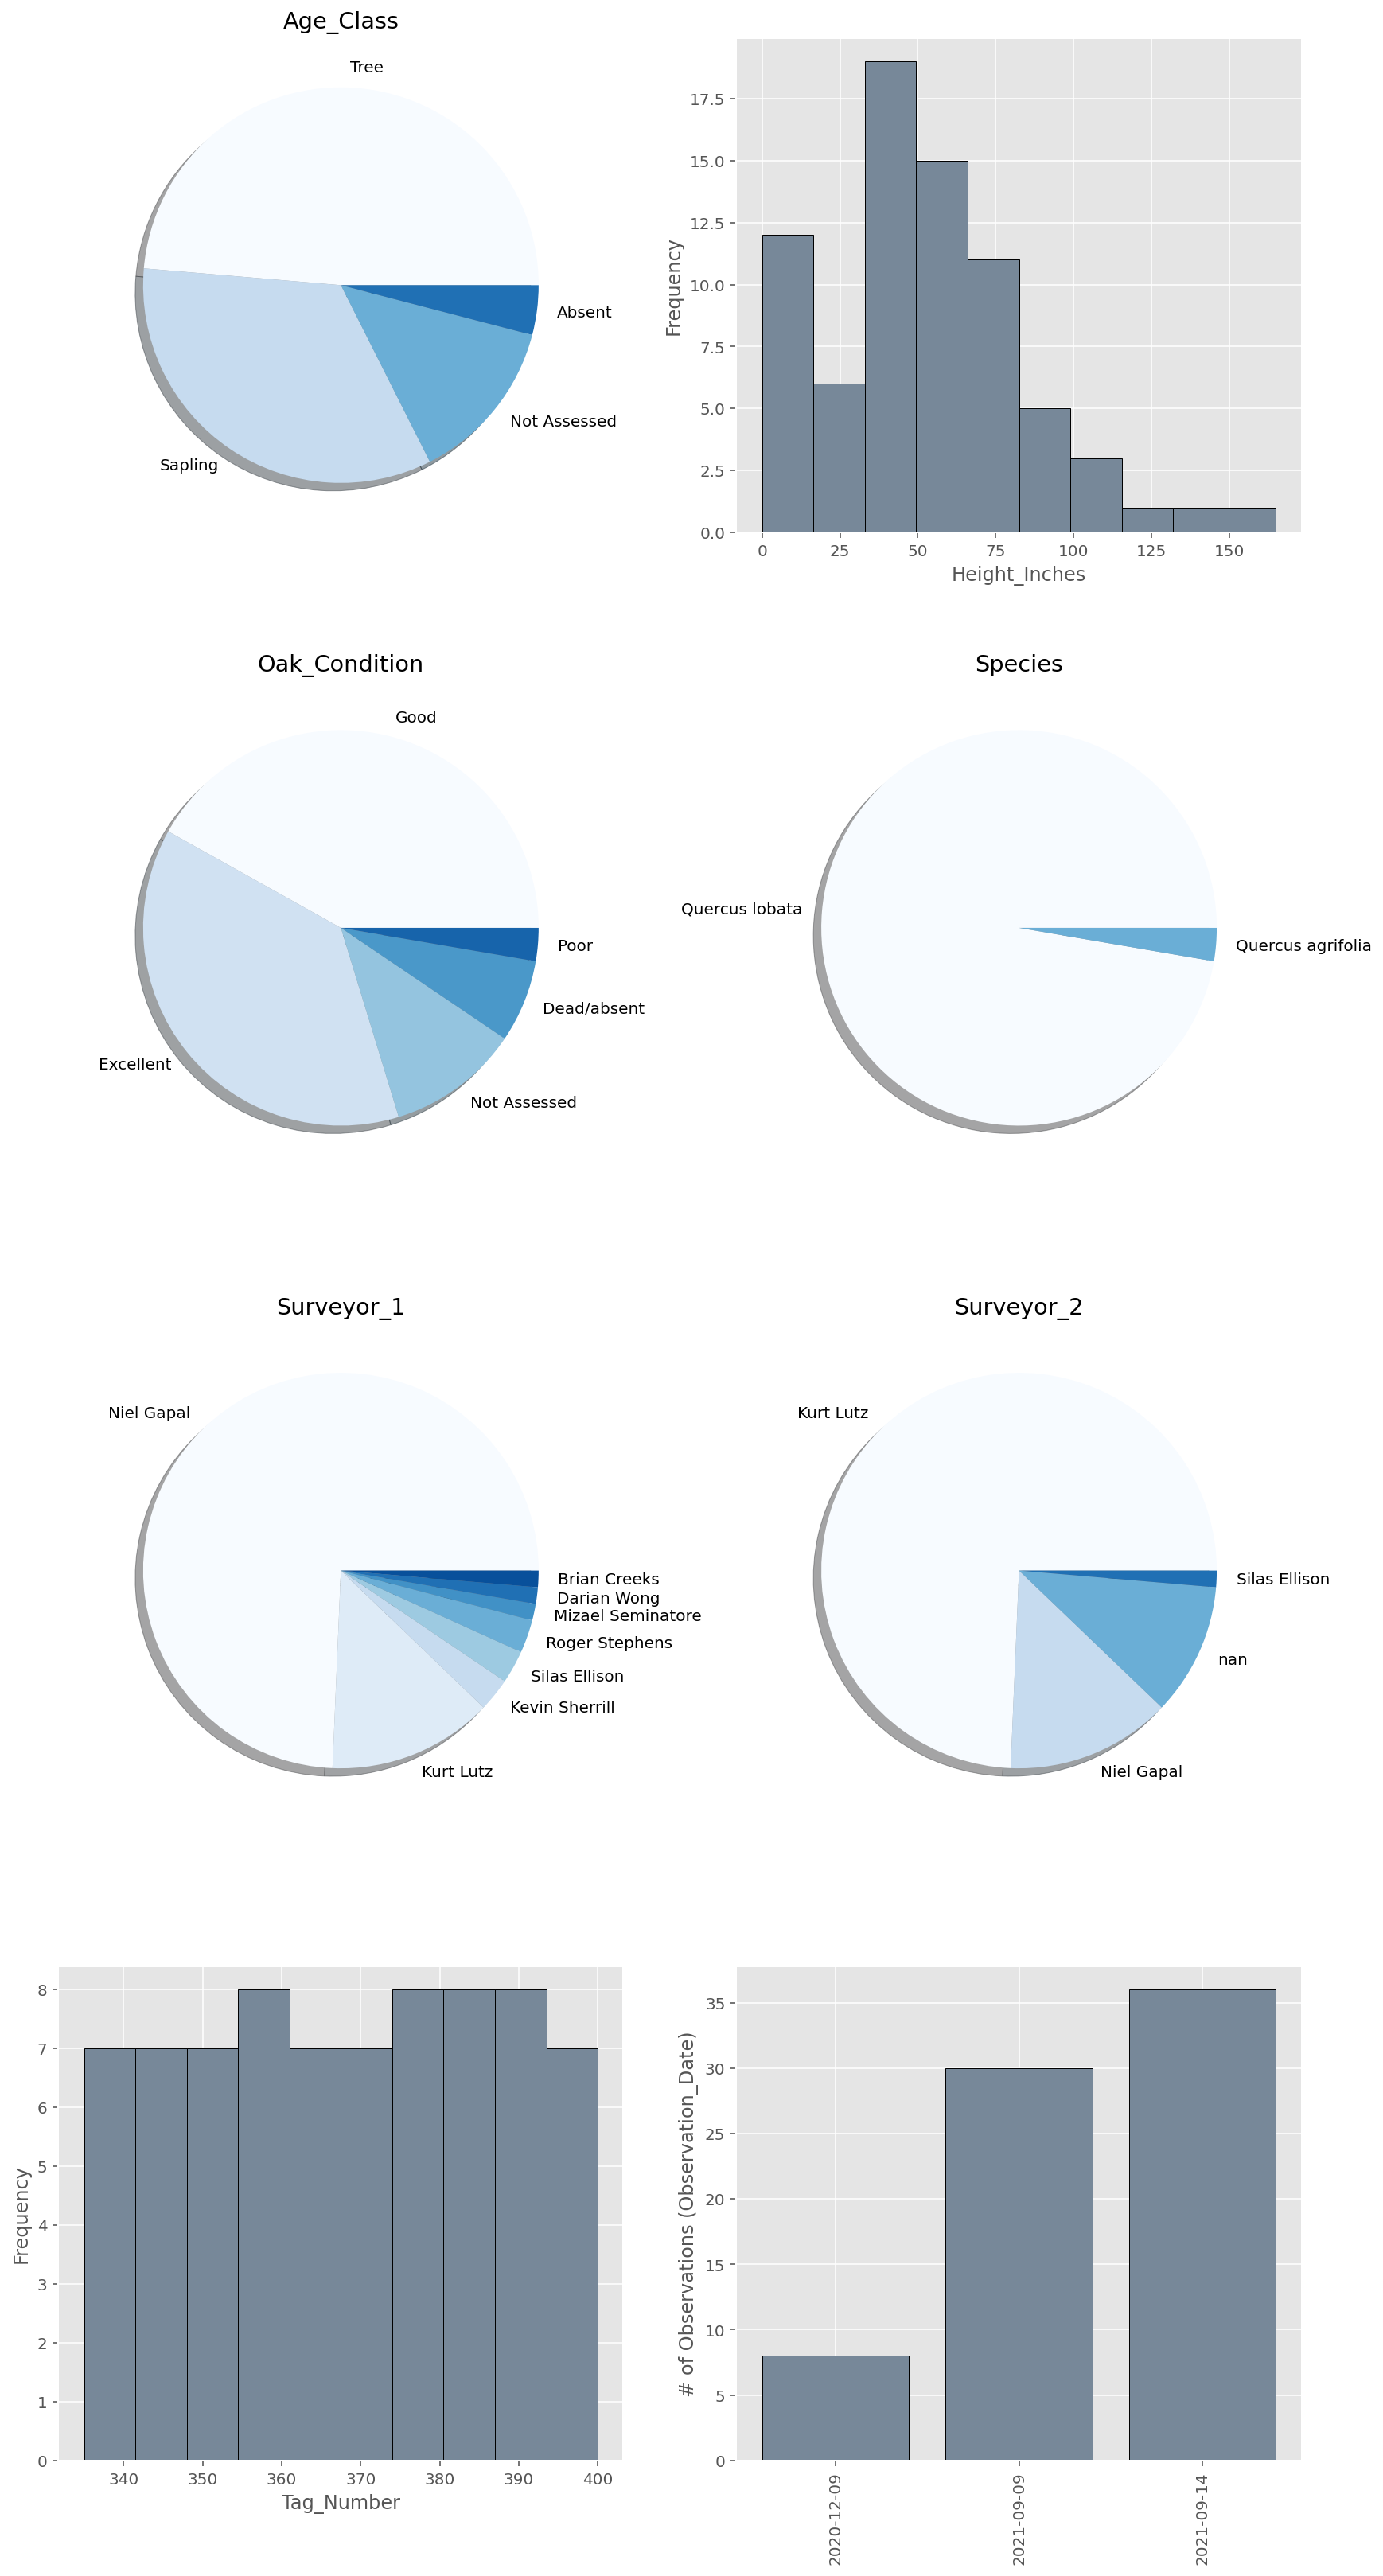

In [10]:
QAQC_plot(sub,['Age_Class','Height_Inches','Oak_Condition','Species','Surveyor_1','Surveyor_2','Tag_Number','Observation_Date'])

Height_Inches  Outlier: True
See Outlier Entries Below:


,Point_ObjectID,BHR_Site,Plot_ID,Tag_Number,Species,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Age_Class,Height_Inches,Oak_Condition,Tree_Shelter_Condition,Maintenance_Needs,Vegetation_Management,Comments,Record_GlobalID,Survey_Type,Height_Inches_Outlier
15,4,SAC,4.1S-0-4,397,Quercus lobata,"{'x': 606212.0839999998, 'y': 4159755.0250000004, 'spatialReferenc...",218,2021-09-09 20:29:19,Kurt Lutz,Niel Gapal,Tree,144.5,Excellent,Intact,None,Yes,Unable to remove all thatch or enter cage due to size of tree,46677dea-cf1e-435a-b515-14953b81aafc,Performance,True
250,61,SAC,5.2S-3-8,340,Quercus lobata,"{'x': 606961.6752000004, 'y': 4160029.8430000003, 'spatialReferenc...",263,2021-09-14 18:14:06,Niel Gapal,Kurt Lutz,Tree,165.0,Excellent,Intact,NA,Yes,Furroughing on the stem and some grazing is evident. Robust leafy ...,a274c5f6-280f-4048-8384-f69d19dbd875,Performance,True


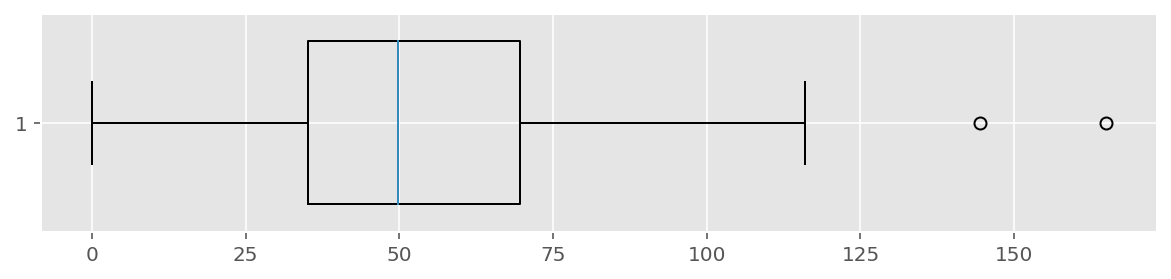

In [11]:
foo = find_outlier(sub, ['Height_Inches'])

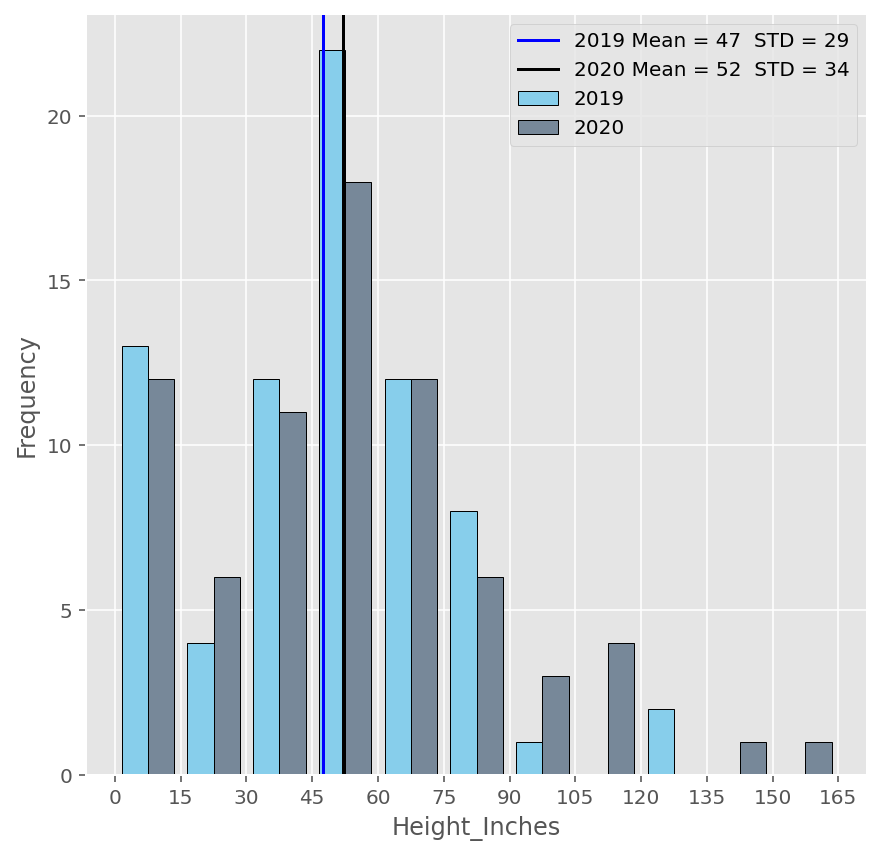

In [12]:
compare_years_continuous(data, 'Height_Inches', '2019', '2020', 15)

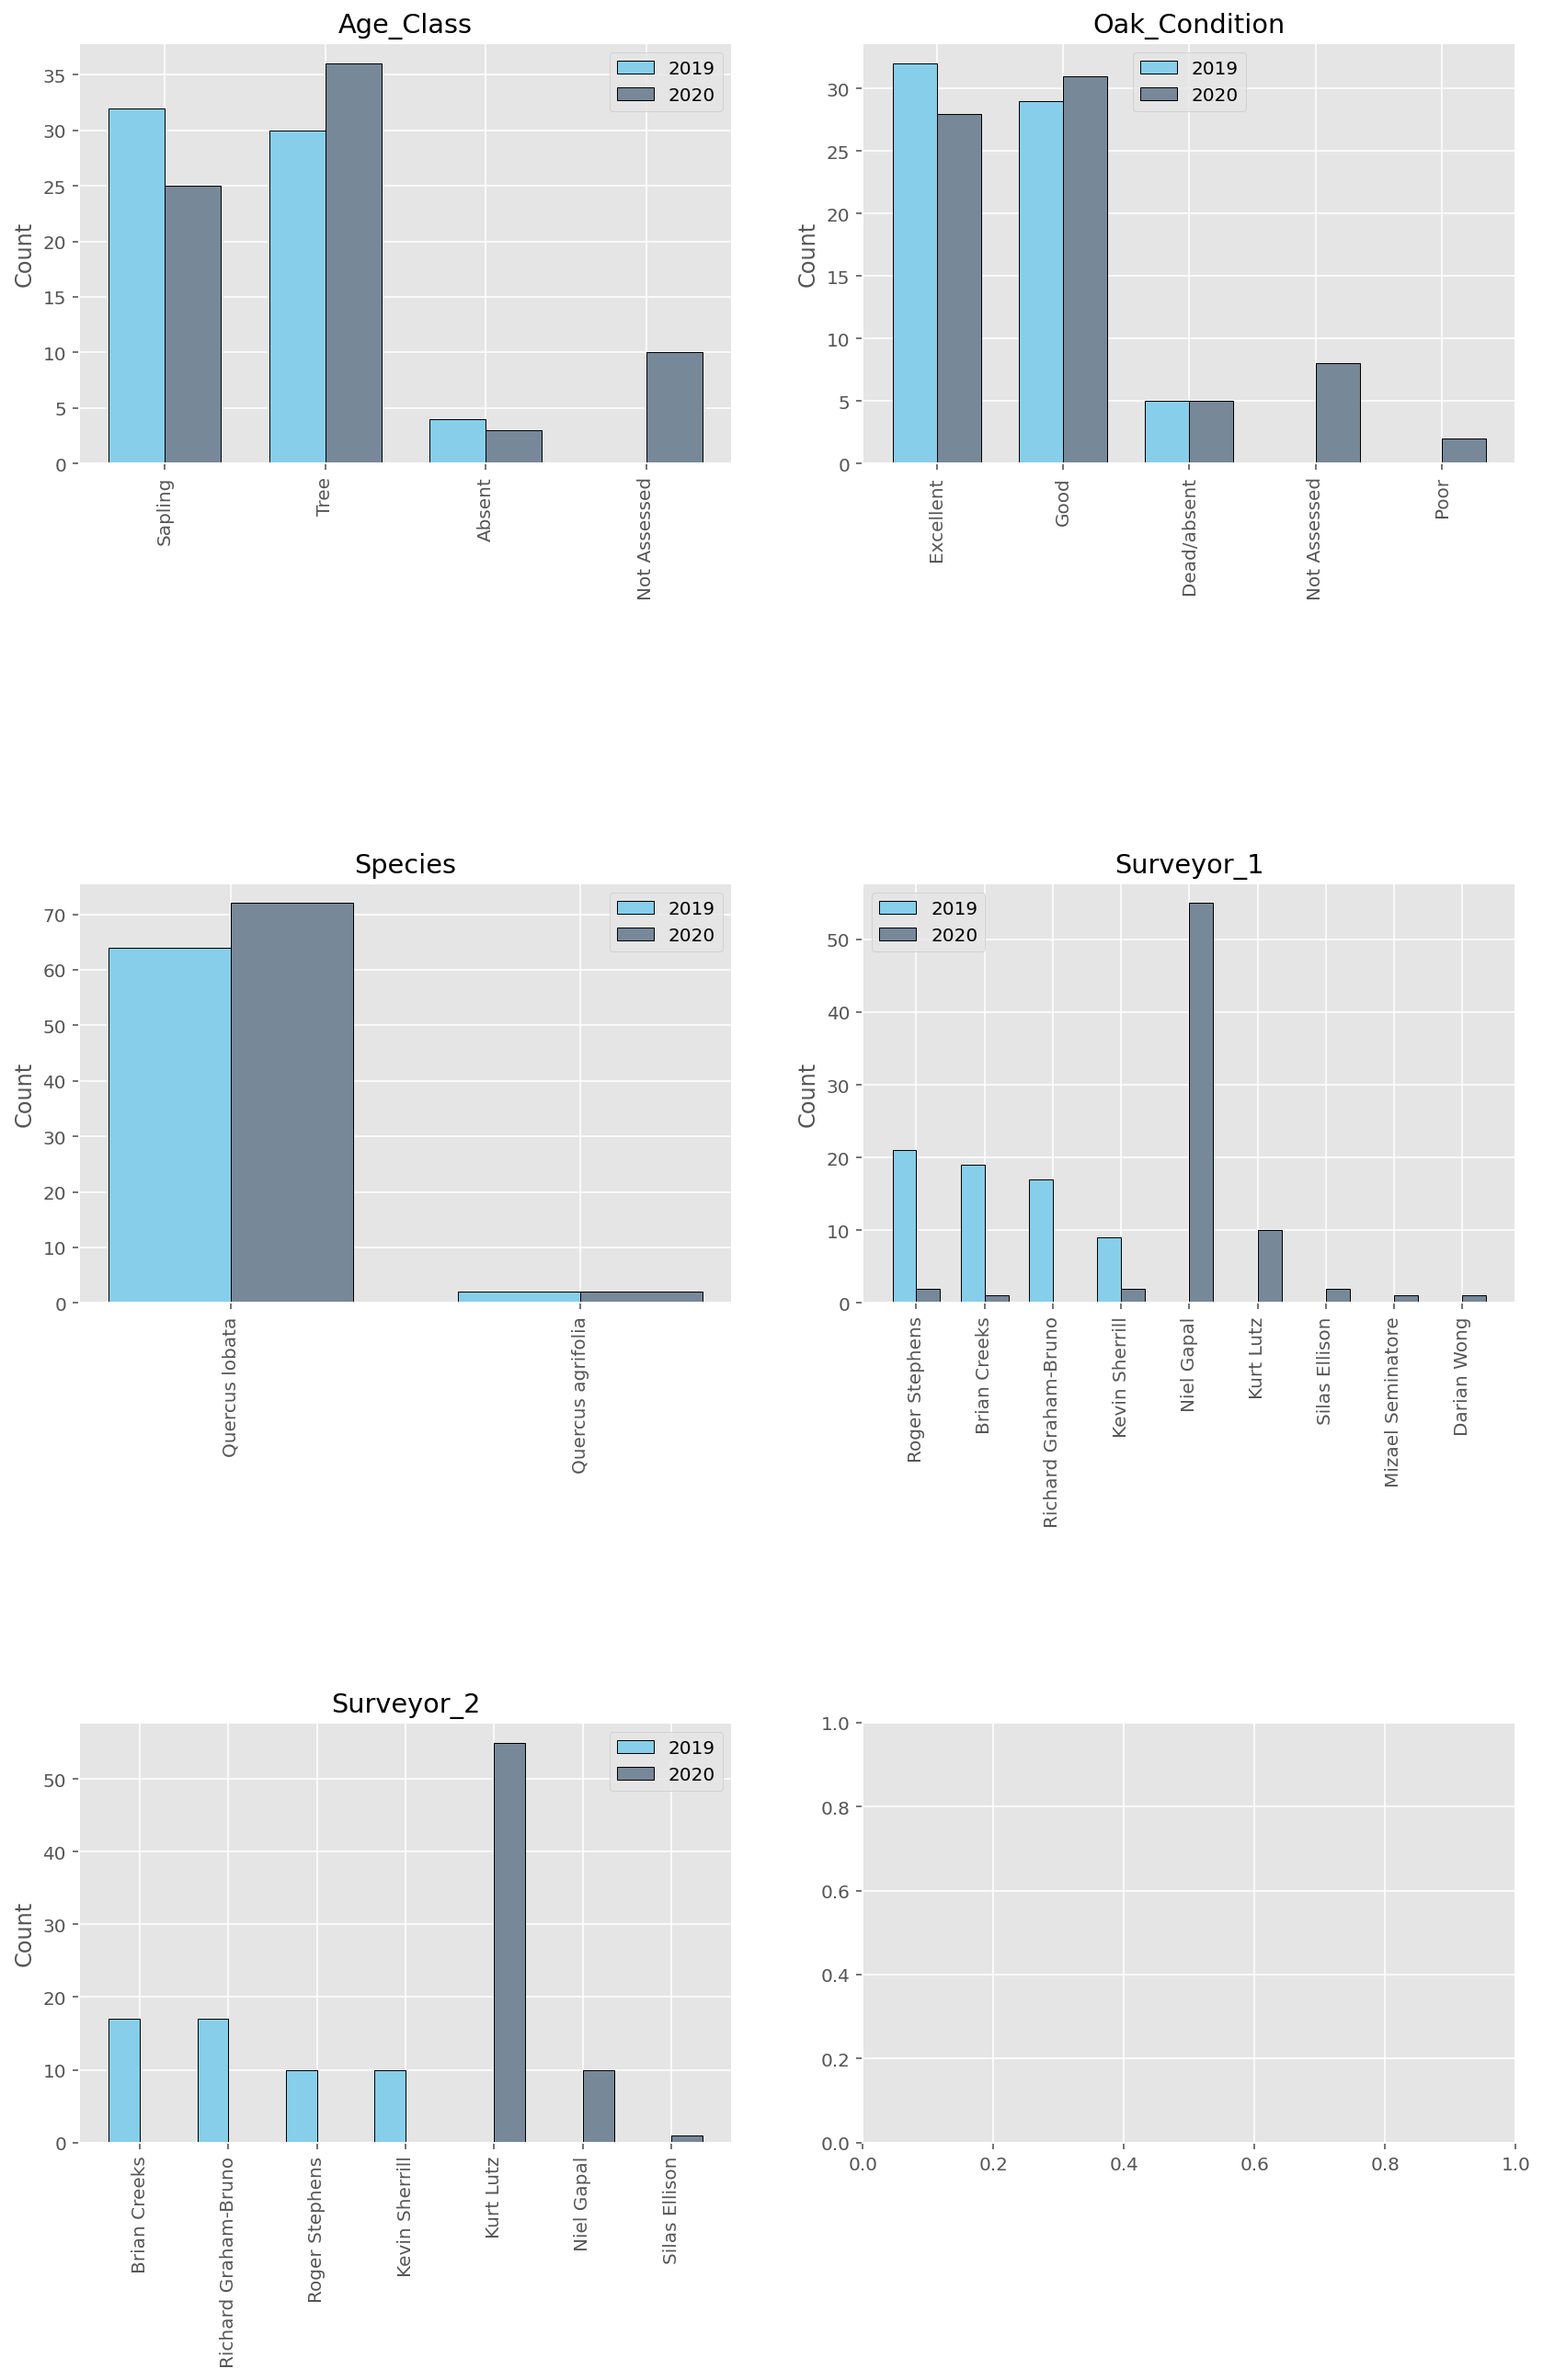

In [13]:
cols = ['Age_Class','Oak_Condition','Species','Surveyor_1','Surveyor_2']
compare_years_catagorical(data, cols,'2019','2020')

Dropping surveyors with less than 7.4 observations
They did not make over 10% of total observation
Dropping Surveyors: ['Kevin Sherrill' 'Silas Ellison' 'Roger Stephens' 'Mizael Seminatore'
 'Darian Wong' 'Brian Creeks']


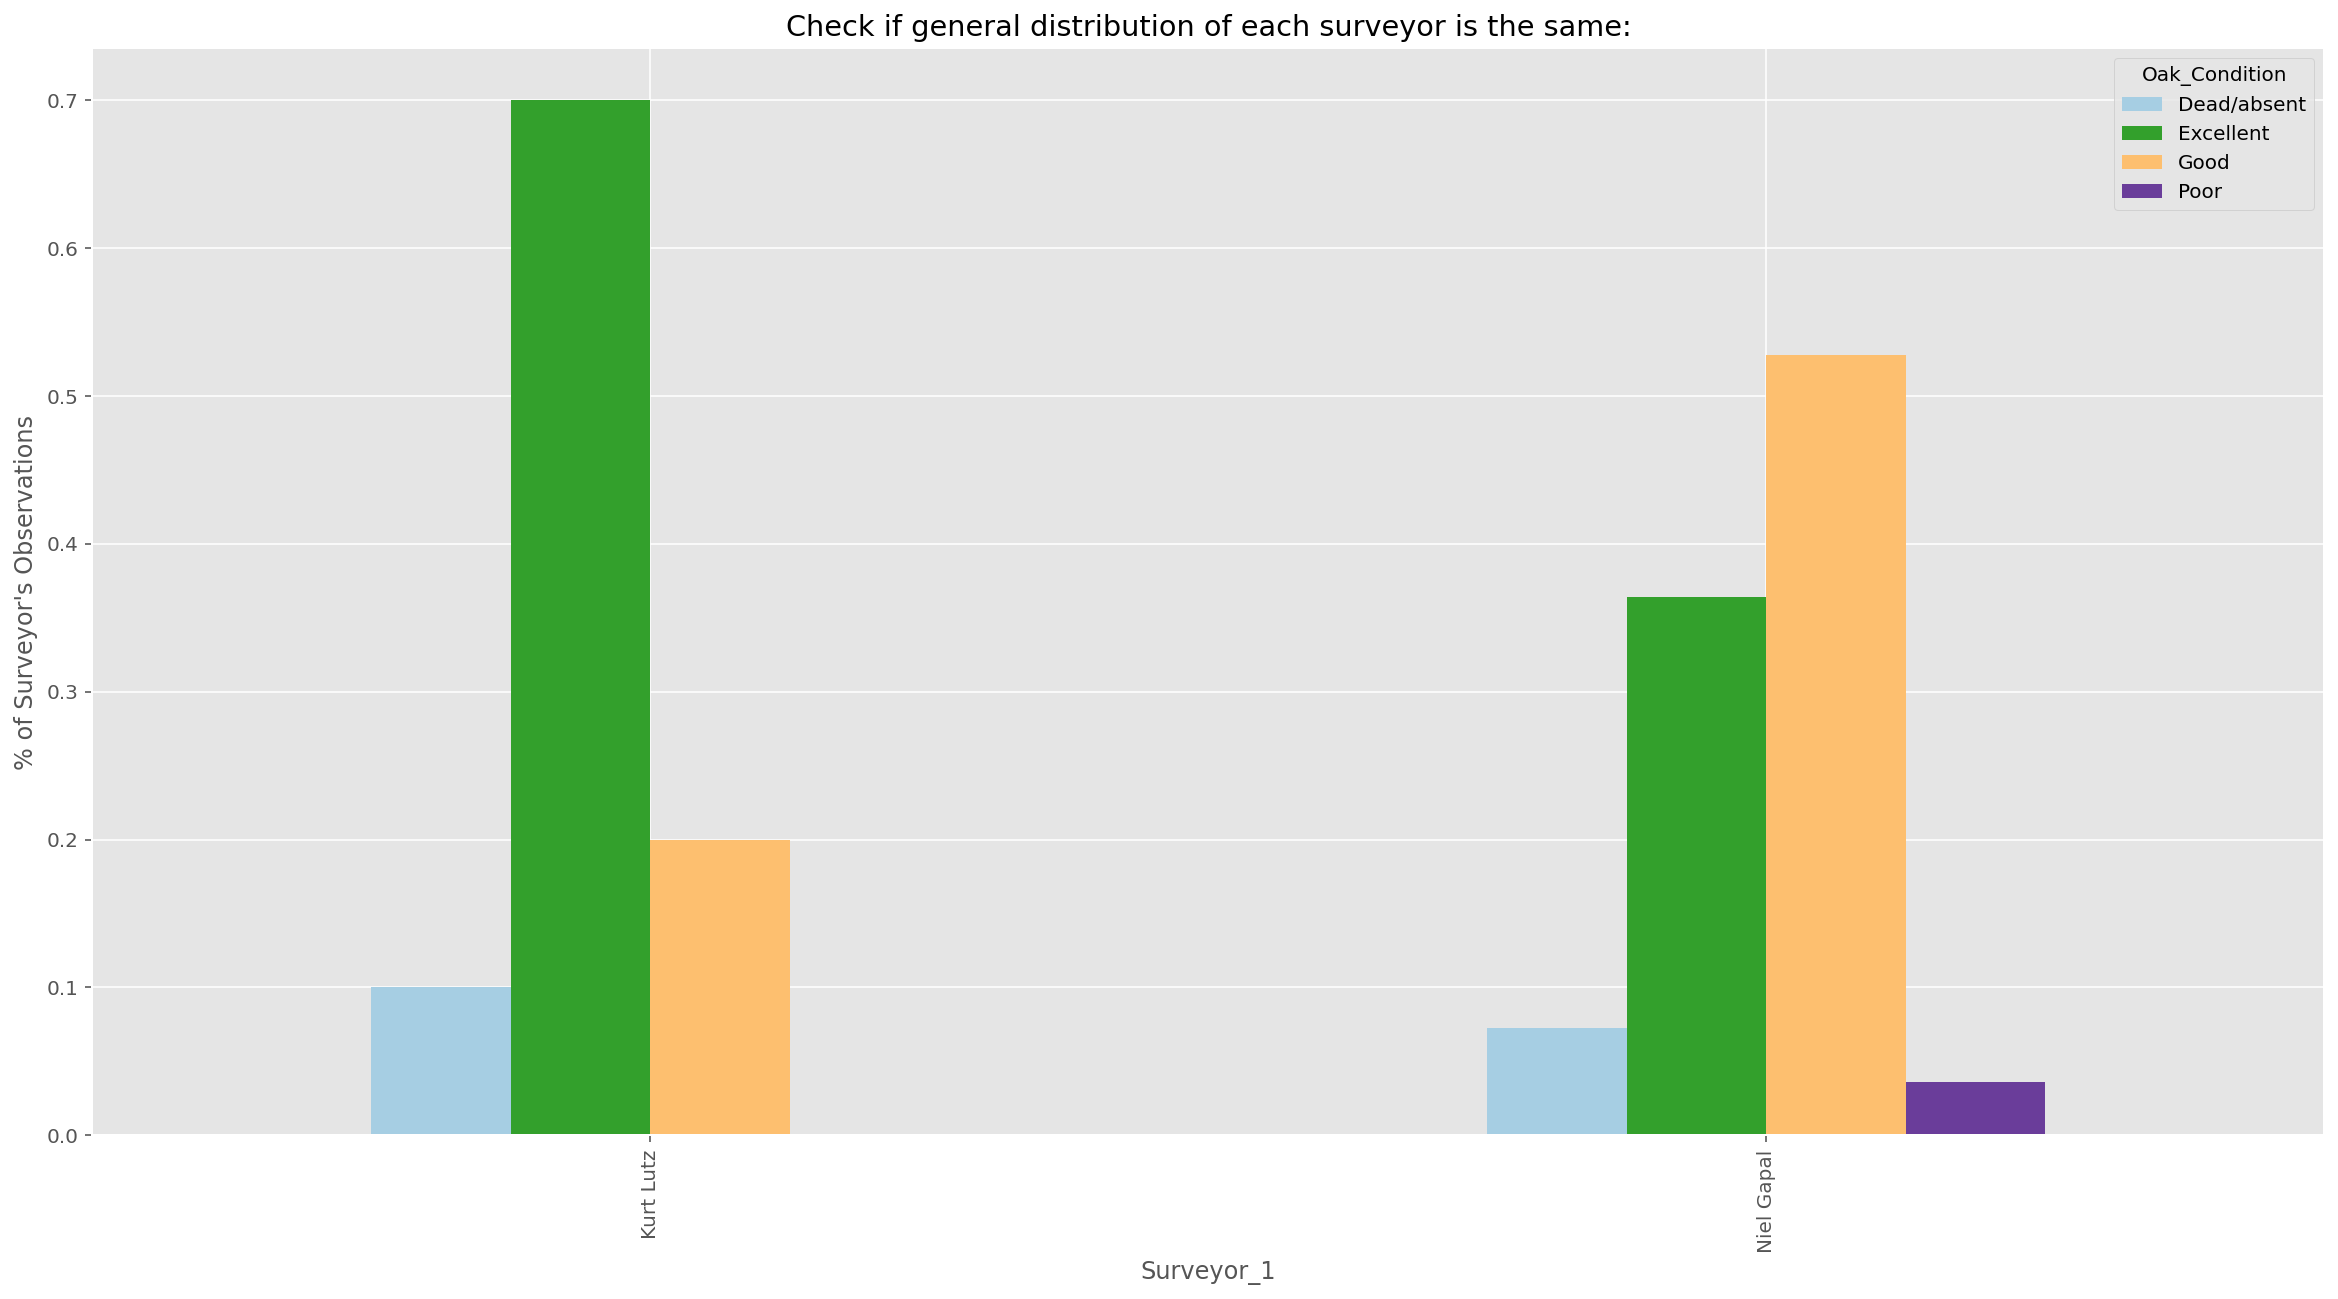

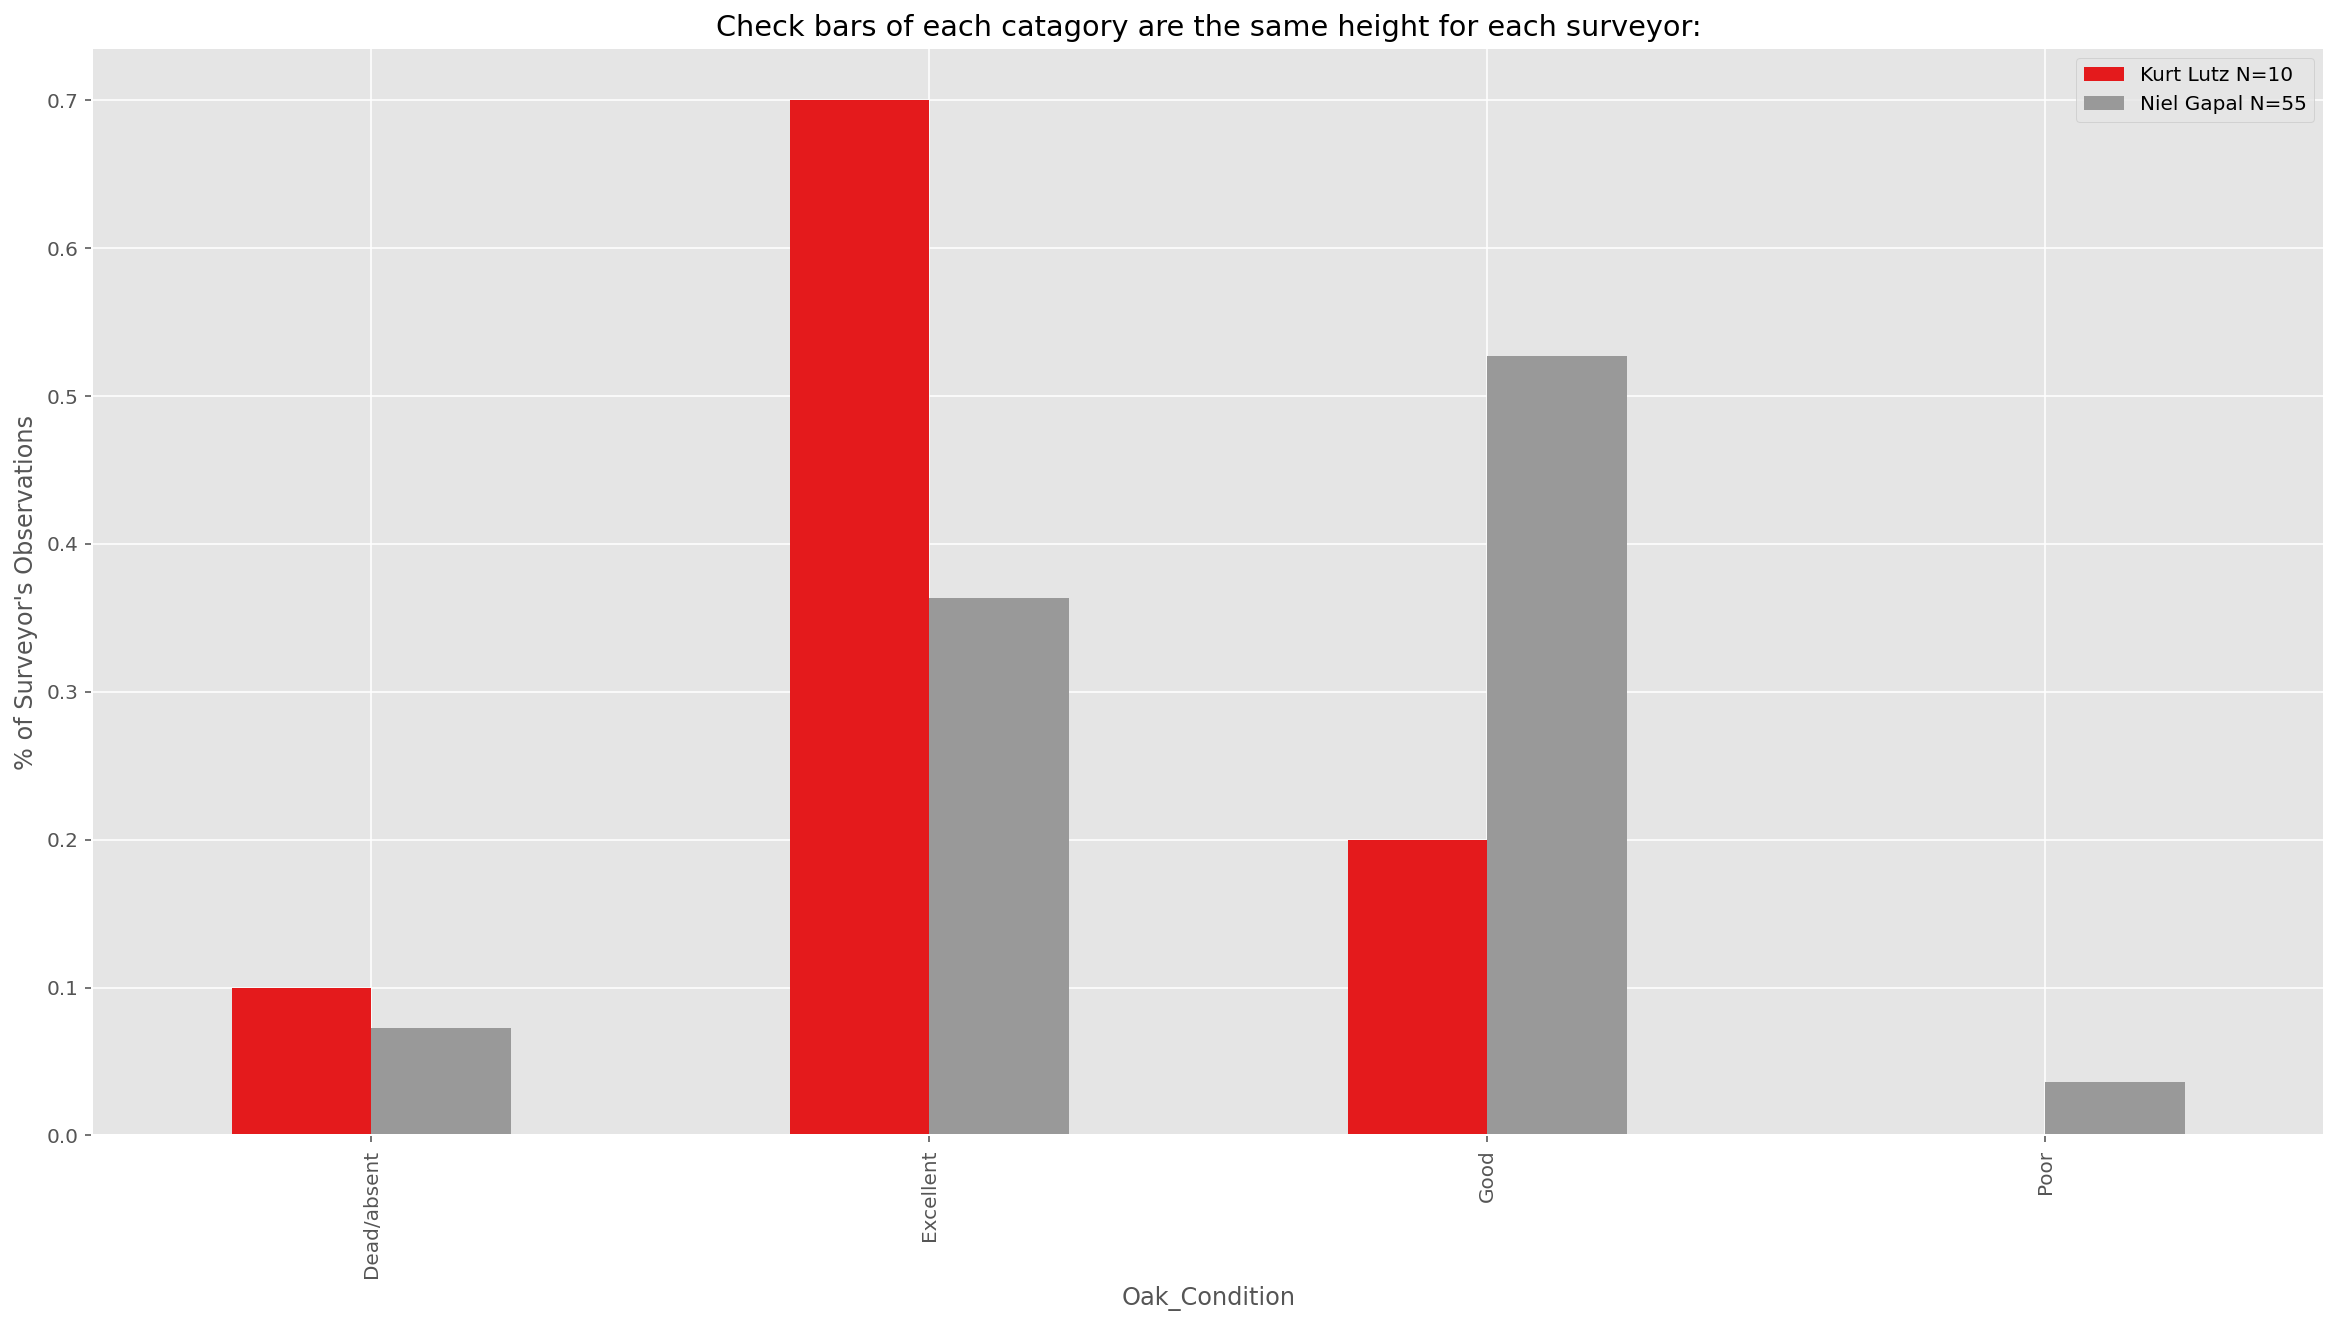

In [14]:
compare_surveyors(sub, 'Oak_Condition', 'Surveyor_1', 10)

In [15]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Stations



No mislabeled photos found for layer/table Observations


# ADD FILTER HERE SO ONLY LOOKING AT PERFORMANCE RECORDS (12/10/2020 Ryan and Roger)

In [9]:
# Check that Age Class has appropriate heights

seedling_R = data.loc[(data.Age_Class == 'Seedling') & (data.Height_Inches >= 11.8),]
if not seedling_R.empty:
    print('ERROR: Seedling entries with height >= 11.8 in:')
    display(seedling_R)
else:
    print('All seedling entries have a height less than 11.8 in')

sapling_R = data.loc[(data.Age_Class == 'Sapling') & ((data.Height_Inches < 11.8)|(data.Height_Inches >= 52.8)),]
if not sapling_R.empty:
    print('ERROR: Sapling entries with height <= 11.8 in or > 52.8 in:')
    display(sapling_R)
else:
    print('All sapling entries have a height >= 11.8 in and < 52.8 in')
    
tree_R = data.loc[(data.Age_Class == 'Tree') & (data.Height_Inches < 52.8),]
if not tree_R.empty:
    print('ERROR: Tree entries with height < 52.8 in:')
    display(tree_R)
else:
    print('All tree entries have a height >= 52.8 in')

All seedling entries have a height less than 11.8 in
All sapling entries have a height >= 11.8 in and < 52.8 in
All tree entries have a height >= 52.8 in


In [10]:
# Check that Age Class Absent has height of 0

absent_R = data.loc[(data.Age_Class == 'Absent') & (data.Height_Inches != 0),]
if not absent_R.empty:
    print('ERROR: Absent entries with height not equal to 0 in:')
    display(absent_R)
else:
    print('No issues')

No issues


In [11]:
# Check that Age Class Not Assessed has height of 0

not_assessed_R = data.loc[(data.Age_Class == 'Not Assessed') & (data.Height_Inches != 0),]
if not not_assessed_R.empty:
    print('ERROR: Not Assessed entries with height not equal to 0 in:')
    display(not_assessed_R)
else:
    print('No issues')

No issues


In [12]:
# Check that recruit height is rounded to the nearest 0.25 inches

height_R = data.loc[(data.Height_Inches % 0.25 != 0),]
if not height_R.empty:
    print('ERROR: Recruit height not rounded to the nearest 0.25 inches')
    display(height_R)
else:
    print('No issues')

No issues


#  Results
## Compare difference in height between target year and previous year

In [13]:
#Drop maintnenace observations from the data sets
sub = sub.loc[(sub.Survey_Type == 'Performance')]
prevYear = prevYear.loc[(prevYear.Survey_Type == 'Performance')]

In [14]:
#Set index to Tag Number
curYear = sub.set_index('Plot_ID')
prevYear = prevYear.set_index('Plot_ID')

In [15]:
#Subtract heights between year by Tag Number (indexes)
ff = curYear.Height_Inches - prevYear.Height_Inches
height_diff = pd.DataFrame(ff)
height_diff.columns = ['Height_Difference']

In [16]:
print(len(height_diff.loc[height_diff.Height_Difference < 0,:]),'recruits decreased in height')
print(len(height_diff.loc[height_diff.Height_Difference > 0,:]),'recruits increased in height')
print(len(height_diff.loc[height_diff.Height_Difference == 0,:]),'recruits did not change in height')

18 recruits decreased in height
43 recruits increased in height
5 recruits did not change in height


Height_Difference  Outlier: True
See Outlier Entries Below:


,Height_Difference,Height_Difference_Outlier
Plot_ID,,
4.1S-0-4,24.50,True
4.1S-5-1,-11.75,True
4.1S-8-3,18.50,True
5.2S-2-3,30.25,True
5.2S-3-4,21.75,True
5.2S-3-5,34.00,True
5.2S-3-8,33.00,True
5.2S-4-2,29.25,True
5.2S-4-3,27.00,True


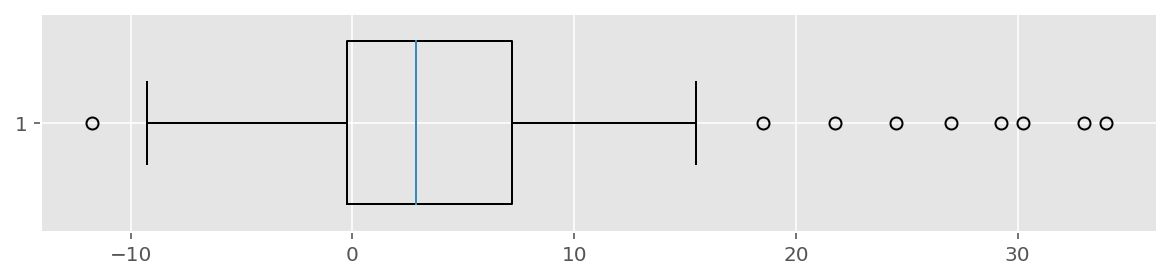

In [17]:
#Find outliers among height difference
height_diff.rename(columns={'Height_Inches':'Height_Difference'}, inplace=True)
foo = find_outlier(height_diff, ['Height_Difference'])

## Results for Annual Report

In [18]:
# Age Class Count
print('Age Class Count:\n',sub.Age_Class.value_counts().to_string())

Age Class Count:
 Tree       34
Sapling    28
Absent      4


In [19]:
# Alive Individuals Count
alive = sub.loc[sub.Oak_Condition != "Dead/absent",:]
print('Count of Alive Individuals for target year:',tYear,'\n',alive.Age_Class.value_counts().to_string())

Count of Alive Individuals for target year: 2020 
 Tree       34
Sapling    27


In [20]:
# Alive Individuals Count
alive_prev = prevYear.loc[prevYear.Oak_Condition != "Dead/absent",:]
print('Count of Alive Individuals for previous year:',pYear,'\n',alive_prev.Age_Class.value_counts().to_string())

Count of Alive Individuals for previous year: 2019 
 Sapling    31
Tree       30


In [21]:
#Vigor Results - count of each condition
condition_count = sub.Oak_Condition.value_counts()
print("Recruit Vigor Results - Oak Condition - ",tYear,"\n", condition_count.to_string())
print("Total Alive   ",condition_count.sum()-condition_count["Dead/absent"])

Recruit Vigor Results - Oak Condition -  2020 
 Good           31
Excellent      28
Dead/absent     5
Poor            2
Total Alive    61


In [22]:
#Vigor Results Previous Year
condition_countp = prevYear.Oak_Condition.value_counts()
print("Recruit Vigor Results - Oak Condition - ",pYear,"\n", condition_countp.to_string())
print("Total Alive   ",condition_countp.sum()-condition_countp["Dead/absent"])

Recruit Vigor Results - Oak Condition -  2019 
 Excellent      32
Good           29
Dead/absent     5
Total Alive    61


# Export Excel Data Deliverable

In [23]:
data.columns

Index(['Point_ObjectID', 'BHR_Site', 'Plot_ID', 'Tag_Number', 'Species',
       'SHAPE', 'Record_ObjectID', 'Observation_Date', 'Surveyor_1',
       'Surveyor_2', 'Age_Class', 'Height_Inches', 'Oak_Condition',
       'Tree_Shelter_Condition', 'Maintenance_Needs', 'Vegetation_Management',
       'Comments', 'Record_GlobalID', 'Survey_Type'],
      dtype='object')

In [24]:
field_order = [
'BHR_Site',
'Plot_ID',
'Tag_Number',
'Observation_Date',
'Survey_Type',
'Surveyor_1',
'Surveyor_2',
'Species',
'Age_Class',
'Height_Inches',
'Oak_Condition',
'Tree_Shelter_Condition',
'Maintenance_Needs',
'Vegetation_Management',
'Comments',
'Point_ObjectID',
'Record_ObjectID',
'Record_GlobalID',
'SHAPE'
]

In [25]:
export_data_deliverable(data, feature_service, field_order, file_name='SAC_Oak_Recruitment')

Exported to Outputs/SAC_Oak_Recruitment_Data_20211028.xlsx
